In [ ]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn sklearn statsmodels pycountry-convert geopy folium
'numpy' in sys.modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder
import sqlite3
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster


pd.options.display.max_rows = 4000
plt.style.use('ggplot')
%matplotlib inline


In [ ]:
# read data
#data_path='/Users/ioanaralucatiriac/Documents/ASU/Data Visualization/Course Project/adult.data'
data_path="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data=pd.read_csv(data_path,sep=',')
data.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",
              "race","gender","capital-gain","capital-loss","hours-per-week","native-country","salary-class"]
print(data)

In [ ]:
data.dtypes

In [ ]:
data.shape

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
mosaic(data, ['education', 'gender', 'salary-class'],ax=ax)
#mosaic(data, ['education', 'gender', 'salary-class'])
plt.show()

In [ ]:
mosaic(data, ['gender','salary-class'])
plt.show()

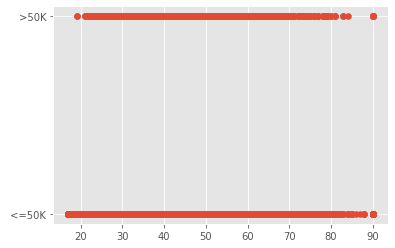

In [ ]:
plt.scatter(data['age'], data['salary-class'])
plt.show()

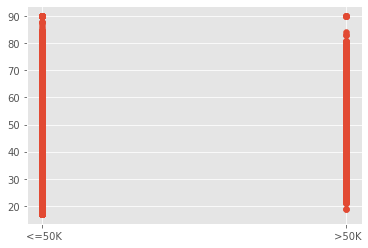

In [ ]:
plt.scatter(data['salary-class'], data['age'])
plt.show()

In [ ]:
data.columns=data.columns.str.strip()

([<matplotlib.axis.YTick at 0x7f77f45116d8>,
 <a list of 20 Text major ticklabel objects>)

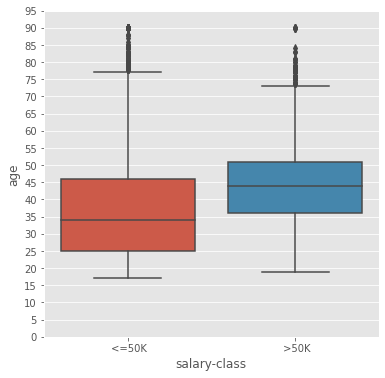

In [ ]:
temp_df=data[['age', 'salary-class']]
temp_df=temp_df[temp_df['age']!=0]
plt.figure(figsize=(6,6))
sns.boxplot(temp_df['salary-class'], temp_df['age'])
plt.yticks(list(range(0, 100, 5)))

In [ ]:
ncct=pd.crosstab(data['occupation'], data['salary-class']).apply(lambda r: r/r.sum(), axis=1)*100
ncct.sort_values(by='>50K', ascending=False, inplace=True)


([<matplotlib.axis.YTick at 0x7fc3e7c51d30>,
 <a list of 11 Text major ticklabel objects>)

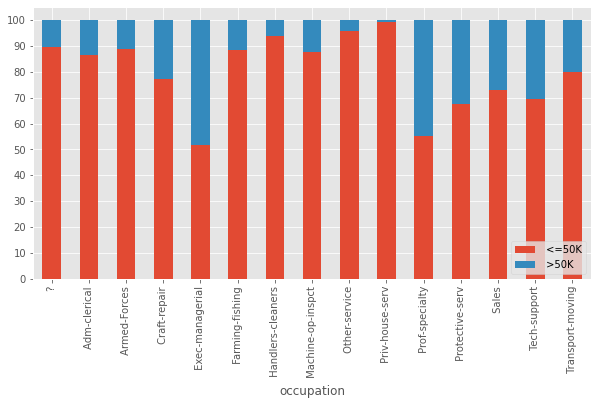

In [ ]:
ncct.plot.bar(stacked=True, figsize=(10, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

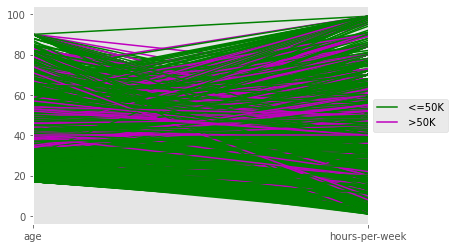

In [ ]:
# conn = sqlite3.connect(":memory:")
# db = data.to_sql('adults.data', conn, if_exists='append', index=False)
# con = sqlite3.connect('adults')
# cur = con.cursor()
# cur.execute("SELECT * \
#             FROM adults.data \
#             WHERE salary-class LIKE '%>50K%';")
# counts = cur.fetchall()
# adultStats = pd.DataFrame.from_records(counts, columns=['age', 'hours-per-week'])
parallel_coordinates(data[['age', 'hours-per-week', 'salary-class']], 'salary-class',color=['g','m'])
plt.gca().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

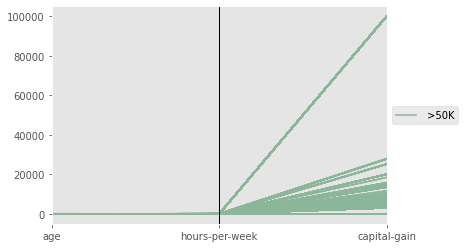

In [ ]:
salary_class_condition = data['salary-class'].str.contains('>50K', case=False)
salary_data = data.loc[salary_class_condition]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'capital-gain','salary-class']], 'salary-class')
plt.gca().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

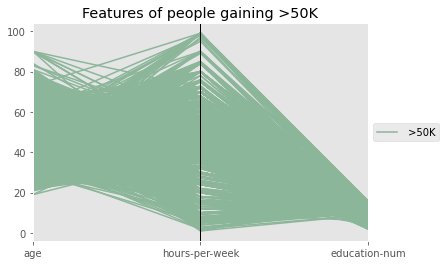

In [ ]:
salary_class_over_50K = data['salary-class'].str.contains('>50K', case=False)
salary_data = data.loc[salary_class_over_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'education-num','salary-class']], 'salary-class')
plt.gca().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Features of people gaining >50K')
plt.show()

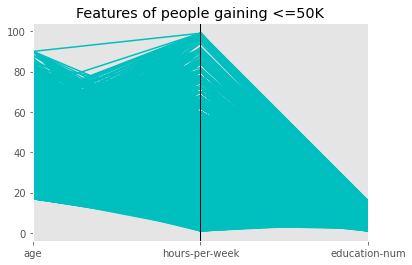

In [ ]:
salary_class_under_50K = data['salary-class'].str.contains('<=50K', case=False)
salary_data = data.loc[salary_class_under_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'education-num','salary-class']], 'salary-class', color=['c'])
plt.gca().legend_.remove()
plt.title('Features of people gaining <=50K')
plt.show()

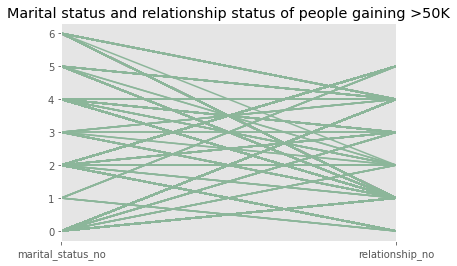

In [ ]:
# transform categorical data into numerical data
lb_make = LabelEncoder()
data["marital_status_no"] = lb_make.fit_transform(data["marital-status"])
data["relationship_no"] = lb_make.fit_transform(data["relationship"])
salary_data_over_50K = data.loc[salary_class_over_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data_over_50K[['marital_status_no','relationship_no','salary-class']], 'salary-class')
plt.gca().legend_.remove()
plt.title('Marital status and relationship status of people gaining >50K')
plt.show()
# TODO legend of encoding needed

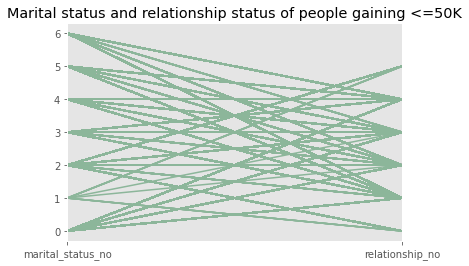

In [ ]:
# transform categorical data into numerical data
lb_make = LabelEncoder()
data["marital_status_no"] = lb_make.fit_transform(data["marital-status"])
data["relationship_no"] = lb_make.fit_transform(data["relationship"])
salary_data_under_50K = data.loc[salary_class_under_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data_under_50K[['marital_status_no','relationship_no','salary-class']], 'salary-class')
plt.gca().legend_.remove()
plt.title('Marital status and relationship status of people gaining <=50K')
plt.show()
# TODO legend of encoding needed

Education of people earning >50K


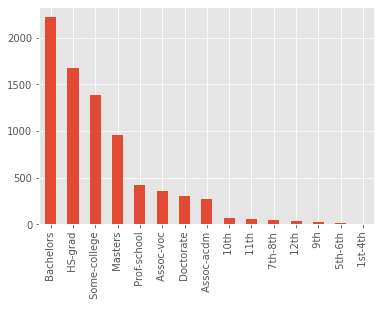

In [ ]:
print('Education of people earning >50K')
df = pd.DataFrame.copy(salary_data_over_50K[['salary-class', 'gender', 'education']])
df['education'].value_counts().plot.bar()

Education of people earning <=50K


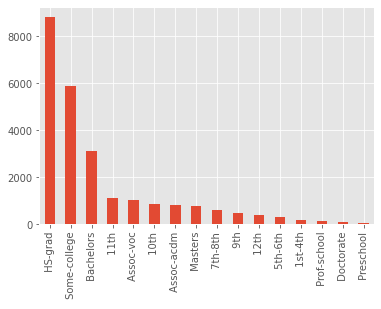

In [ ]:
print('Education of people earning <=50K')
df = pd.DataFrame.copy(salary_data_under_50K[['salary-class', 'gender', 'education']])
df['education'].value_counts().plot.bar()

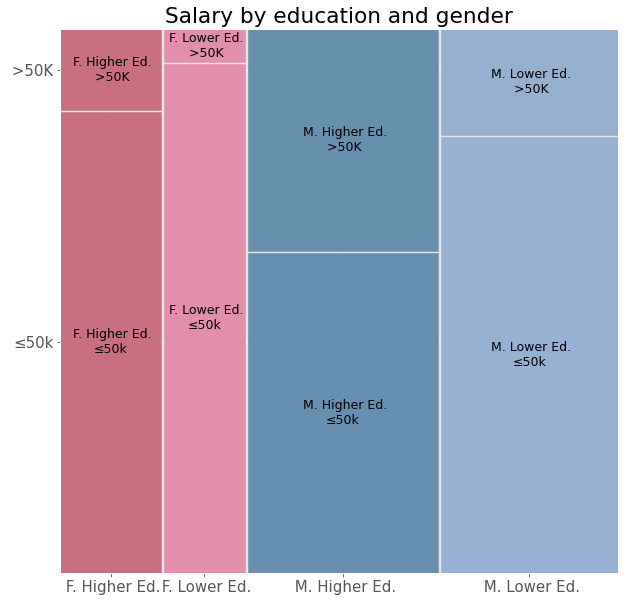

In [ ]:
df = pd.DataFrame.copy(data[['salary-class', 'gender', 'education']])
fig, ax = plt.subplots(figsize=(10,10))
higherEducList = ['Some-college', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'] 
df['education'] = df['education'].map(lambda r: 'Higher Ed.' if str(r).strip() in higherEducList else 'Lower Ed.')
df['salary-class'] = df['salary-class'].map(lambda r: r if str(r).strip() == ">50K" else "≤50k")


df['combined'] = df['gender'] + df['education']
df['combined'] = df['combined'].map(lambda r: str(r).replace('Male', 'M. ').replace('Female', 'F. '))

df = df.sort_values(by=['combined'])

cols = {(' F. Higher Ed.', ' >50K'):'#C8707E',(' F. Higher Ed.', '≤50k'):'#C8707F',
        (' F. Lower Ed.',' >50K' ):'#E28FAB', (' F. Lower Ed.', '≤50k'):'#E28FAB', 
        (' M. Higher Ed.', ' >50K'):'#678FAE',(' M. Higher Ed.', '≤50k'):'#678FAF',
        (' M. Lower Ed.',' >50K' ):'#96B1D0', (' M. Lower Ed.', '≤50k'):'#96B1D3'}
mosaic(df, ['combined','salary-class'],  properties = lambda key: {'color': cols[key]}, ax=ax)
plt.rcParams['font.size'] = 15.0

plt.title("Salary by education and gender")

plt.show()

In [ ]:
#function to convert to alpah2 country codes and continents
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

print(data['native-country'])
# data['native-country'] = data['native-country'].map(lambda r: get_continent(r))
data['native-country'] = data['native-country'].map(lambda r: get_continent(r))


In [ ]:
#function to get longitude and latitude data from country name
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
data['native-country'] = data['native-country'].map(lambda r: geolocate(r))
# print(data['native-country'])

Text(0.5, 1.0, 'Influence of marital status over Income')

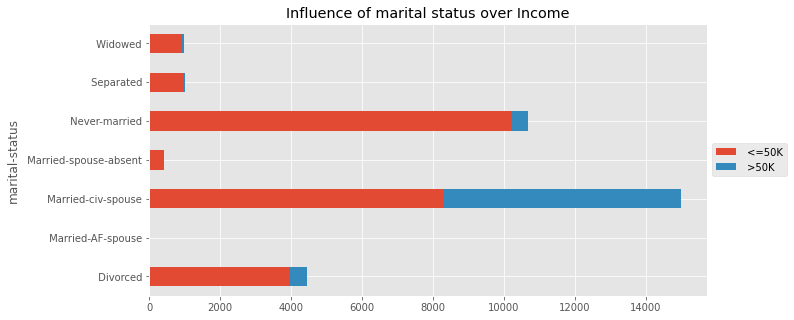

In [ ]:
mcct=pd.crosstab(data['marital-status'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
mcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of marital status over Income')
# plt.yticks(list(range(0, 101, 10)))

Text(0.5, 1.0, 'Influence of marital status over Income in %')

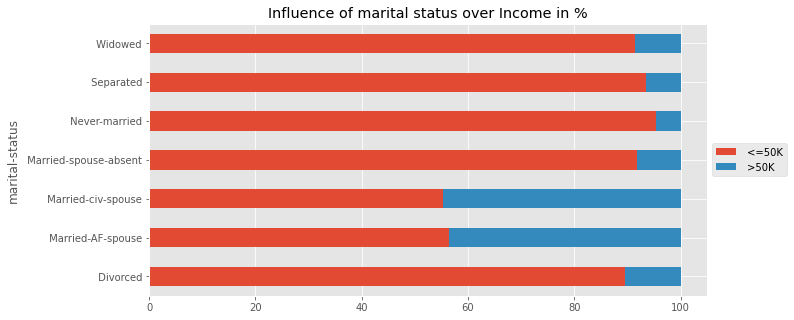

In [ ]:
mcct=pd.crosstab(data['marital-status'], data['salary-class']).apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
mcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of marital status over Income in %')

Text(0.5, 1.0, 'Influence of relationship over Income')

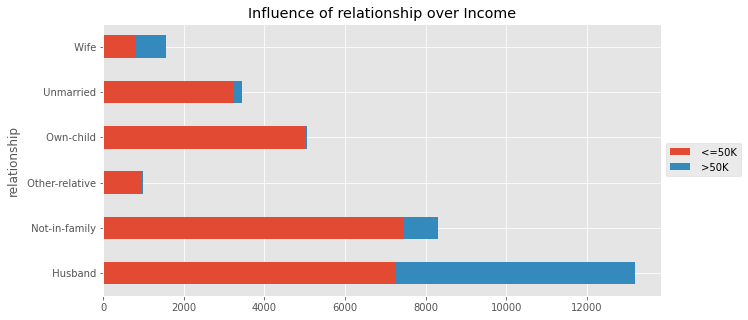

In [ ]:
rcct=pd.crosstab(data['relationship'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
rcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of relationship over Income')

Text(0.5, 1.0, 'Influence of relationship over Income')

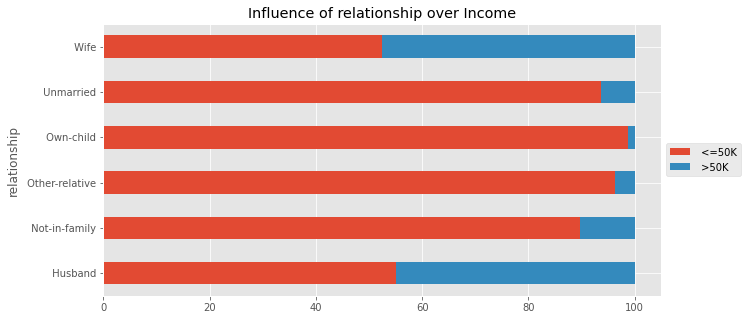

In [ ]:
rcct=pd.crosstab(data['relationship'], data['salary-class']).apply(lambda r: r/r.sum(), axis=1)*100
# rcct.sort_values(by='>50k', ascending=False, inplace=True)
rcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of relationship over Income')

Text(0.5, 1.0, 'Influence of race over Income')

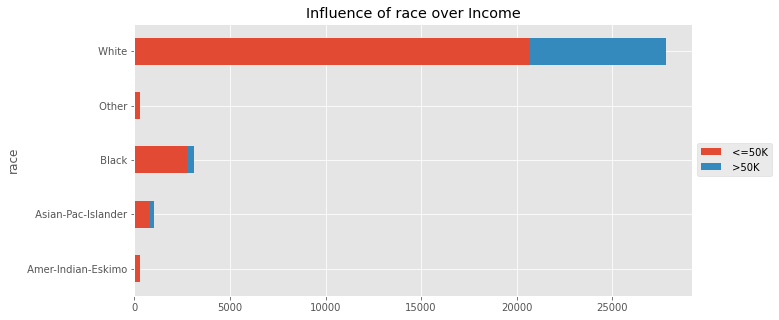

In [ ]:
race_cct=pd.crosstab(data['race'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
race_cct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of race over Income')

Text(0.5, 1.0, 'Influence of education over Income')

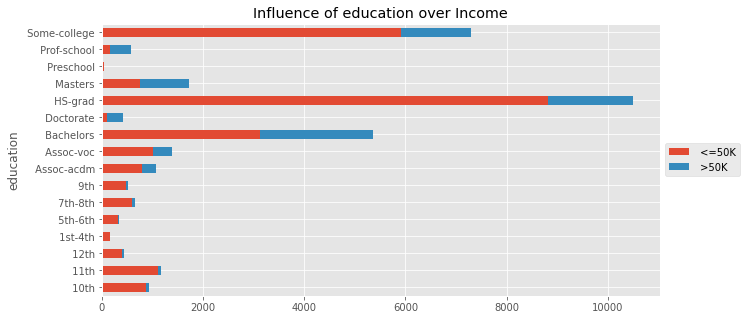

In [ ]:
mcct=pd.crosstab(data['education'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
mcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of education over Income')

Text(0.5, 1.0, 'Influence of capital-gain over Income')

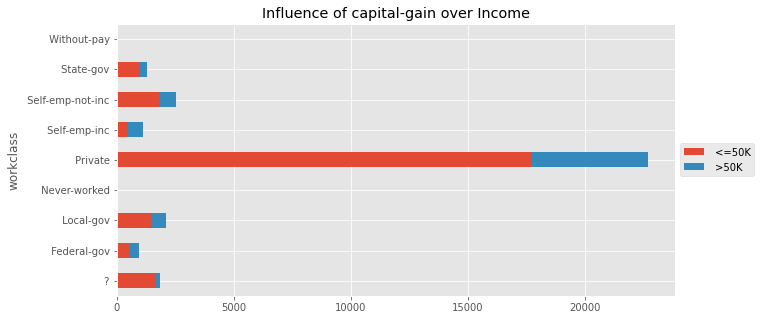

In [ ]:
mcct=pd.crosstab(data['workclass'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
mcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of workclass over Income')

Text(0.5, 1.0, 'Influence of occupation over Income')

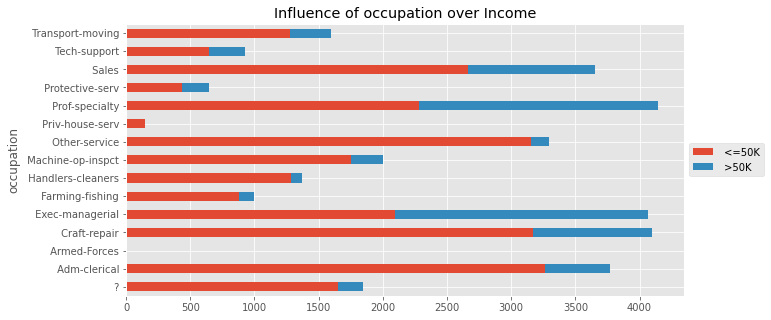

In [ ]:
mcct=pd.crosstab(data['occupation'], data['salary-class'])
# .apply(lambda r: r/r.sum(), axis=1)*100
# ncct.sort_values(by='>50K', ascending=False, inplace=True)
mcct.plot.barh(stacked=True, figsize=(10, 5))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Influence of occupation over Income')